In [4]:
#Importar librerias necesarias
#%pip install funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [3]:
#Carga desde un archivo .csv sin indice y eliminar filas innecesarias
Madrid=pd.read_csv("listings Madrid.csv")
Madrid

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.403810,-3.741300,Private room,31.0,4,33,2018-07-15,0.28,2,83,0,NaN
1,24805,Gran Via Studio Madrid,346366726,Alvaro,Centro,Universidad,40.421830,-3.705290,Entire home/apt,104.0,5,43,2024-06-01,0.37,1,113,13,NaN
2,40718,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CH...,34217435,Luis,Centro,Justicia,40.419690,-3.697360,Entire home/apt,114.0,2,150,2024-05-30,0.89,15,310,20,NaN
3,40916,Holiday Apartment Madrid Center,130907,Dana,Centro,Universidad,40.422470,-3.705770,Entire home/apt,NaN,5,49,2021-12-11,0.30,3,0,0,NaN
4,30320,Great Vacational Apartments,130907,Dana,Centro,Sol,40.414760,-3.704180,Entire home/apt,NaN,5,172,2022-09-26,1.01,3,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26919,1178424976968116677,Cozy studio in Chamberí,528979463,Digitalización Y Gestión De,Chamberí,Gaztambide,40.433240,-3.712420,Entire home/apt,146.0,1,0,NaN,NaN,3,46,0,VT-87689-M
26920,1178428931888574795,habitación cálida,583336078,Eudy Yocasta,Puente de Vallecas,Numancia,40.398327,-3.654305,Private room,36.0,1,0,NaN,NaN,1,269,0,NaN
26921,1178428958237308022,Alojamiento céntrico,490492827,Candela Angela,Chamberí,Arapiles,40.432800,-3.710090,Entire home/apt,70.0,1,0,NaN,NaN,1,265,0,NaN
26922,1178801297820730122,Costa Golf Resort by Interhome,185902866,Danielle - Interhome Group,Moncloa - Aravaca,Ciudad Universitaria,40.464301,-3.749881,Entire home/apt,107.0,1,0,NaN,NaN,1,273,0,NaN


--------------------------

SUSTITUIR VALORES NULOS

--------------------------

In [5]:
#Identificar valores nulos por columna
Valores_Nulos=Madrid.isnull().sum()
Valores_Nulos

,0
id,0
name,0
host_id,0
host_name,4
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,5304


In [6]:
#Inofrmación tipos de columnas
Tipos_Columnas = Madrid.dtypes
print(Tipos_Columnas)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


In [7]:
#Realizamos una copia del dataframe
copia_Madrid = Madrid.copy()

In [8]:
#Cuarto método de sustitución de valores nulos
#Sustituir valores nulos por un string en  concreto
copia_Madrid["host_name"]=copia_Madrid["host_name"].fillna("SIN NOMBRE")
copia_Madrid["last_review"]=copia_Madrid["last_review"].fillna("SIN FECHA")
copia_Madrid["license"]=copia_Madrid["license"].fillna("SIN LICENCIA")

In [9]:
#Primer método de sustitución de valores nulos
#Sustituir valores nulos con promedio o media
copia_Madrid["price"]=copia_Madrid["price"].fillna(round(copia_Madrid ['price'].mean(),1))

In [10]:
#Tercer método de sustitución de valores nulos
#Sustituir valores nulos por un valor numérico en  concreto
copia_Madrid["reviews_per_month"]=copia_Madrid["reviews_per_month"].fillna("0000")

In [11]:
#Corroboramos valores nulos
valores_nulos=copia_Madrid.isnull().sum()
valores_nulos

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


--------------------------

ELIMINAR OUTLIERS POR EL METODO DE DESVIACION ESTANDAR

--------------------------

In [12]:
copia_Madrid.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,float64


In [13]:
#Separar por columnas cualitativas y cuantitativas
columnas_cualitativas = copia_Madrid.select_dtypes(include = 'object')
columnas_cuantitativas = copia_Madrid.select_dtypes(include = ['int64', 'float64'])

<Figure size 2000x1000 with 0 Axes>

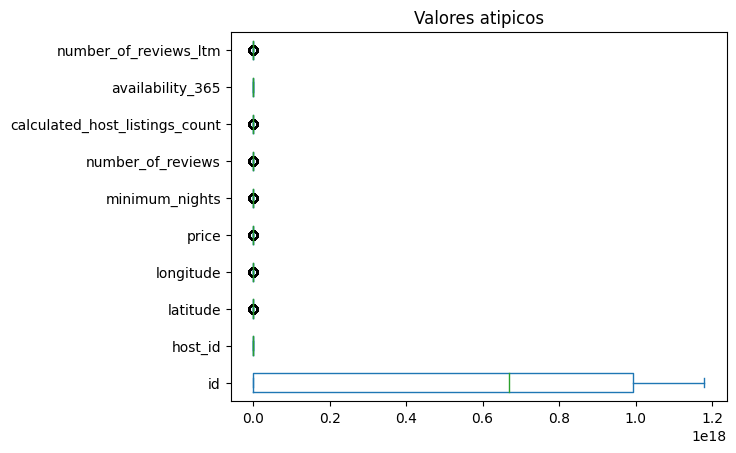

In [14]:
#Hacer un boxplot de valores atipicos de las columnas cuantitativas
fig = plt.figure(figsize = (20, 10))
columnas_cuantitativas.plot(kind = 'box', vert = False)
plt.title("Valores atipicos")
plt.show()

In [15]:
#Identificar los limites superior e inferior
y = columnas_cuantitativas
Limite_superior = y.mean() + 3*y.std()
Limite_inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_superior)
print("Limite inferior permitido", Limite_inferior)

Limite superior permitido id                                1.977067e+18
host_id                           8.238683e+08
latitude                          4.049231e+01
longitude                        -3.610648e+00
price                             9.414253e+02
minimum_nights                    9.978497e+01
number_of_reviews                 2.948332e+02
calculated_host_listings_count    2.140100e+02
availability_365                  5.388179e+02
number_of_reviews_ltm             7.694612e+01
dtype: float64
Limite inferior permitido id                               -9.230685e+17
host_id                          -3.488702e+08
latitude                          4.035093e+01
longitude                        -3.777474e+00
price                            -6.666993e+02
minimum_nights                   -8.458997e+01
number_of_reviews                -2.064369e+02
calculated_host_listings_count   -1.588444e+02
availability_365                 -2.207970e+02
number_of_reviews_ltm            -4.9347

In [16]:
#Filtrar solo por columnas dentro de los limites
columnas_cuantitativas_sin_outliers = columnas_cuantitativas[(y <= Limite_superior) & (y >= Limite_inferior)]

In [17]:
#Revisar valores nulos
valores_nulos_cuantitativo = columnas_cuantitativas_sin_outliers.isnull().sum()
valores_nulos_cuantitativo

,0
id,0
host_id,0
latitude,324
longitude,647
price,132
minimum_nights,171
number_of_reviews,674
calculated_host_listings_count,1099
availability_365,0
number_of_reviews_ltm,552


In [18]:
#Hacer una copia del dataframe y rellenar los valores nulos con la media
columnas_cuantitativas_limpio = columnas_cuantitativas_sin_outliers.copy()
columnas_cuantitativas_limpio = columnas_cuantitativas_limpio.fillna(round(columnas_cuantitativas_sin_outliers.mean(), 1))
columnas_cuantitativas_limpio

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,21853,83531,40.403810,-3.741300,31.0,4.0,33.0,2.0,83,0.0
1,24805,346366726,40.421830,-3.705290,104.0,5.0,43.0,1.0,113,13.0
2,40718,34217435,40.419690,-3.697360,114.0,2.0,150.0,15.0,310,20.0
3,40916,130907,40.422470,-3.705770,137.4,5.0,49.0,3.0,0,0.0
4,30320,130907,40.414760,-3.704180,137.4,5.0,172.0,3.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
26919,1178424976968116677,528979463,40.433240,-3.712420,146.0,1.0,0.0,3.0,46,0.0
26920,1178428931888574795,583336078,40.398327,-3.654305,36.0,1.0,0.0,1.0,269,0.0
26921,1178428958237308022,490492827,40.432800,-3.710090,70.0,1.0,0.0,1.0,265,0.0
26922,1178801297820730122,185902866,40.464301,-3.749881,107.0,1.0,0.0,1.0,273,0.0


In [19]:
#Se juntan las columnas cualitativas con las cuantitativas
Madrid_outliers = pd.concat([columnas_cuantitativas_limpio, columnas_cualitativas], axis = 1)
Madrid_outliers

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review,reviews_per_month,license
0,21853,83531,40.403810,-3.741300,31.0,4.0,33.0,2.0,83,0.0,Bright and airy room,Abdel,Latina,Cármenes,Private room,2018-07-15,0.28,SIN LICENCIA
1,24805,346366726,40.421830,-3.705290,104.0,5.0,43.0,1.0,113,13.0,Gran Via Studio Madrid,Alvaro,Centro,Universidad,Entire home/apt,2024-06-01,0.37,SIN LICENCIA
2,40718,34217435,40.419690,-3.697360,114.0,2.0,150.0,15.0,310,20.0,COZY APARTMENT CIBELES-GRAN VIA-PTA DEL SOL-CH...,Luis,Centro,Justicia,Entire home/apt,2024-05-30,0.89,SIN LICENCIA
3,40916,130907,40.422470,-3.705770,137.4,5.0,49.0,3.0,0,0.0,Holiday Apartment Madrid Center,Dana,Centro,Universidad,Entire home/apt,2021-12-11,0.3,SIN LICENCIA
4,30320,130907,40.414760,-3.704180,137.4,5.0,172.0,3.0,0,0.0,Great Vacational Apartments,Dana,Centro,Sol,Entire home/apt,2022-09-26,1.01,SIN LICENCIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26919,1178424976968116677,528979463,40.433240,-3.712420,146.0,1.0,0.0,3.0,46,0.0,Cozy studio in Chamberí,Digitalización Y Gestión De,Chamberí,Gaztambide,Entire home/apt,SIN FECHA,0000,VT-87689-M
26920,1178428931888574795,583336078,40.398327,-3.654305,36.0,1.0,0.0,1.0,269,0.0,habitación cálida,Eudy Yocasta,Puente de Vallecas,Numancia,Private room,SIN FECHA,0000,SIN LICENCIA
26921,1178428958237308022,490492827,40.432800,-3.710090,70.0,1.0,0.0,1.0,265,0.0,Alojamiento céntrico,Candela Angela,Chamberí,Arapiles,Entire home/apt,SIN FECHA,0000,SIN LICENCIA
26922,1178801297820730122,185902866,40.464301,-3.749881,107.0,1.0,0.0,1.0,273,0.0,Costa Golf Resort by Interhome,Danielle - Interhome Group,Moncloa - Aravaca,Ciudad Universitaria,Entire home/apt,SIN FECHA,0000,SIN LICENCIA


In [20]:
#Comprobamos que no existan valores nulos
valores_nulos_Madrid_outliers = Madrid_outliers.isnull().sum()
valores_nulos_Madrid_outliers

,0
id,0
host_id,0
latitude,0
longitude,0
price,0
minimum_nights,0
number_of_reviews,0
calculated_host_listings_count,0
availability_365,0
number_of_reviews_ltm,0


--------------------------

ANÁLISIS UNIVARIADO A VARIABLES CATEGÓRICAS

--------------------------

In [22]:
#Extraer características de análisis univariado y generar tabla de frecuencias
freq_tbl(Madrid_outliers)
Madrid_outliers.dtypes

                                                    name  frequency  \
0                            Habitación con baño privado         33   
1      H. Individual In Reformed Residence has wifi &...         28   
2                                   Habitación en Madrid         24   
3                                     Habitación privada         23   
4       Fantastic residence ``FUNWAY´´ north zone Madrid         19   
...                                                  ...        ...   
25225                         2° A - Apartamento de lujo          1   
25226              Affordable, Full Service Apartment.2B          1   
25227                                     Tirso Design I          1   
25228           plaza españa 18m² bedroom close Gran Via          1   
25229                                        Farmacia VI          1   

       percentage  cumulative_perc  
0        0.001226         0.001226  
1        0.001040         0.002266  
2        0.000891         0.003157  

,0
id,int64
host_id,int64
latitude,float64
longitude,float64
price,float64
minimum_nights,float64
number_of_reviews,float64
calculated_host_listings_count,float64
availability_365,int64
number_of_reviews_ltm,float64


Text(0.5, 1.0, 'Grupo de vecindario')

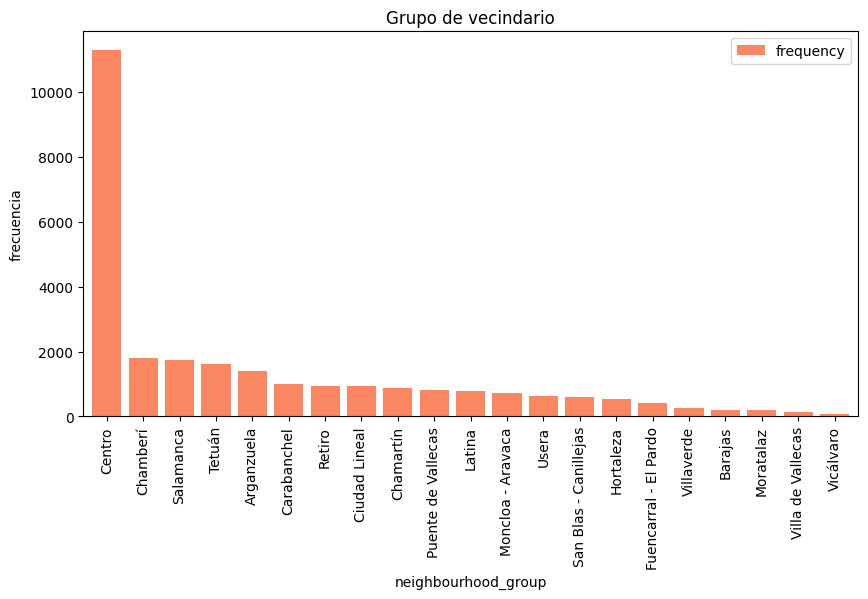

In [52]:
tabla1=freq_tbl(Madrid_outliers["neighbourhood_group"])
filtro1=tabla1[tabla1["frequency"]>1]
filtro1_index=filtro1.set_index("neighbourhood_group")
filtro1_index_freq=filtro1_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro1_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#fa8762")
plt.ylabel("frecuencia")
plt.title("Grupo de vecindario")

Text(0.5, 1.0, 'Vecindarios')

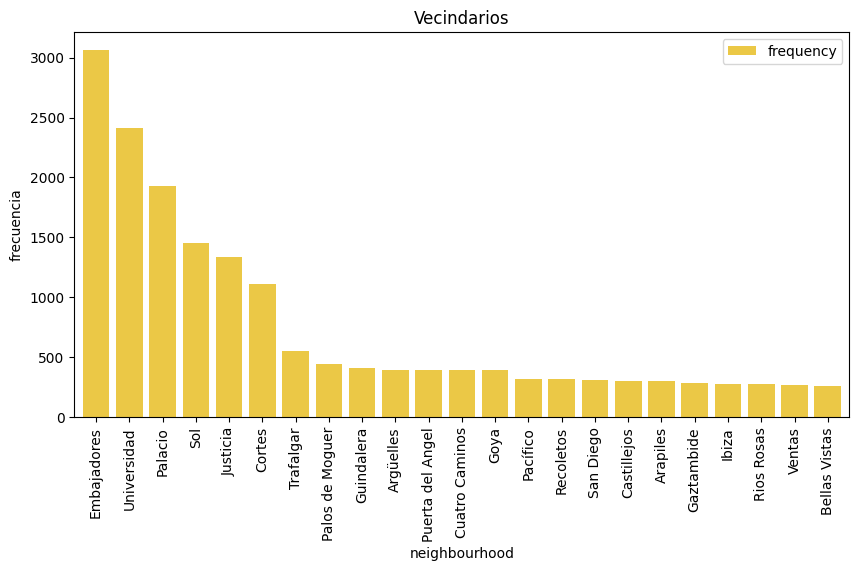

In [50]:
tabla2=freq_tbl(Madrid_outliers["neighbourhood"])
filtro2=tabla2[tabla2["frequency"]>250]
filtro2_index=filtro2.set_index("neighbourhood")
filtro2_index_freq=filtro2_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro2_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#ebc846")
plt.ylabel("frecuencia")
plt.title("Vecindarios")

Text(0.5, 1.0, 'Metodos de pago con proveedores:')

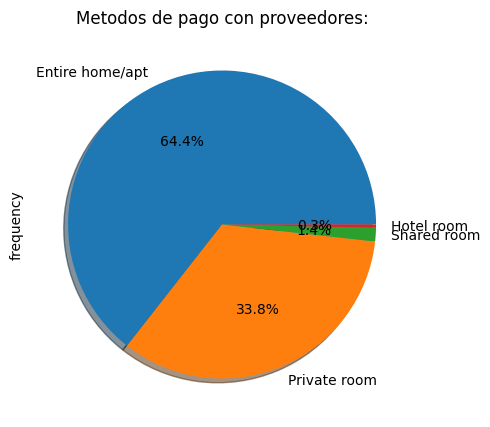

In [59]:
tabla3=freq_tbl(Madrid_outliers["room_type"])
filtro3=tabla3[tabla3["frequency"]>1]
filtro3_index=filtro3.set_index("room_type")
filtro3_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Tipo de cuarto")

Text(0.5, 1.0, 'Fecha de última reseña')

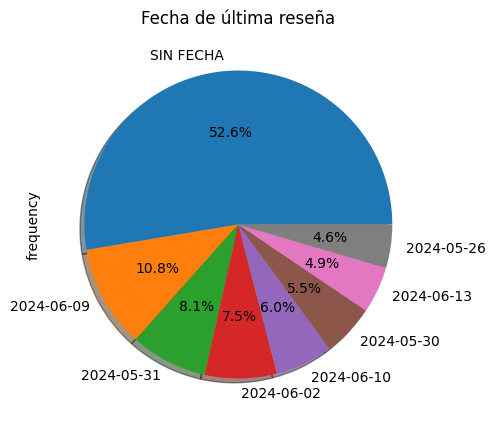

In [69]:
tabla4=freq_tbl(Madrid_outliers["last_review"])
filtro4=tabla4[tabla4["frequency"]>500]
filtro4_index=filtro4.set_index("last_review")
filtro4_index["frequency"].plot(kind="pie", figsize=(10,5),shadow=True, autopct='%1.1f%%' )
plt.title("Fecha de última reseña")

Text(0.5, 1.0, 'Reseñas por mes')

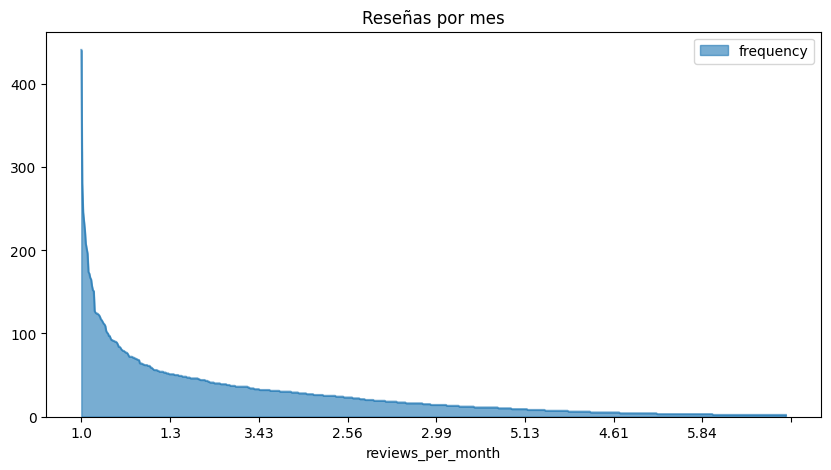

In [87]:
tabla5=freq_tbl(Madrid_outliers["reviews_per_month"])
filtro5 = tabla5[(tabla5["frequency"] > 1) & (tabla5["frequency"] < 5000)]
filtro5_index=filtro5.set_index("reviews_per_month")
filtro5_index_freq=filtro5_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro5_index_freq.plot(kind="area", figsize=(10,5), alpha=.6)
plt.title("Reseñas por mes")

Text(0.5, 1.0, 'Reseñas por mes')

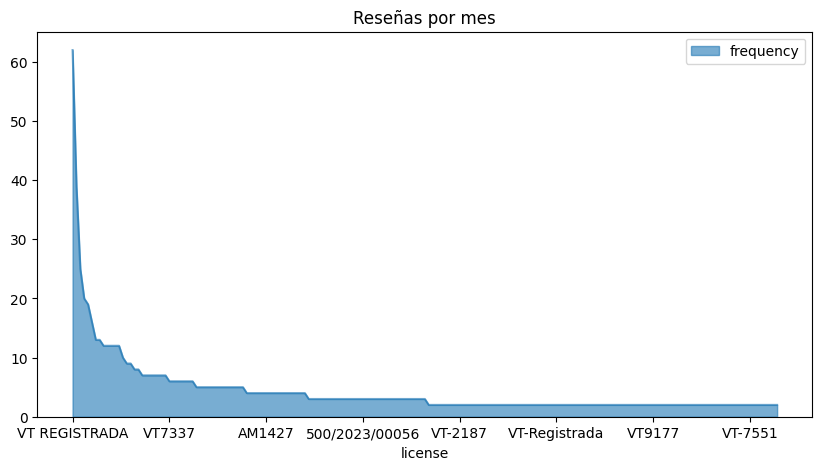

In [91]:
tabla6=freq_tbl(Madrid_outliers["license"])
filtro6 = tabla6[(tabla6["frequency"] > 1) & (tabla5["frequency"] < 5000)]
filtro6_index=filtro6.set_index("license")
filtro6_index_freq=filtro6_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro6_index_freq.plot(kind="area", figsize=(10,5), alpha=.6)
plt.title("Licencia")

Text(0.5, 1.0, 'Nombre del alojamiento')

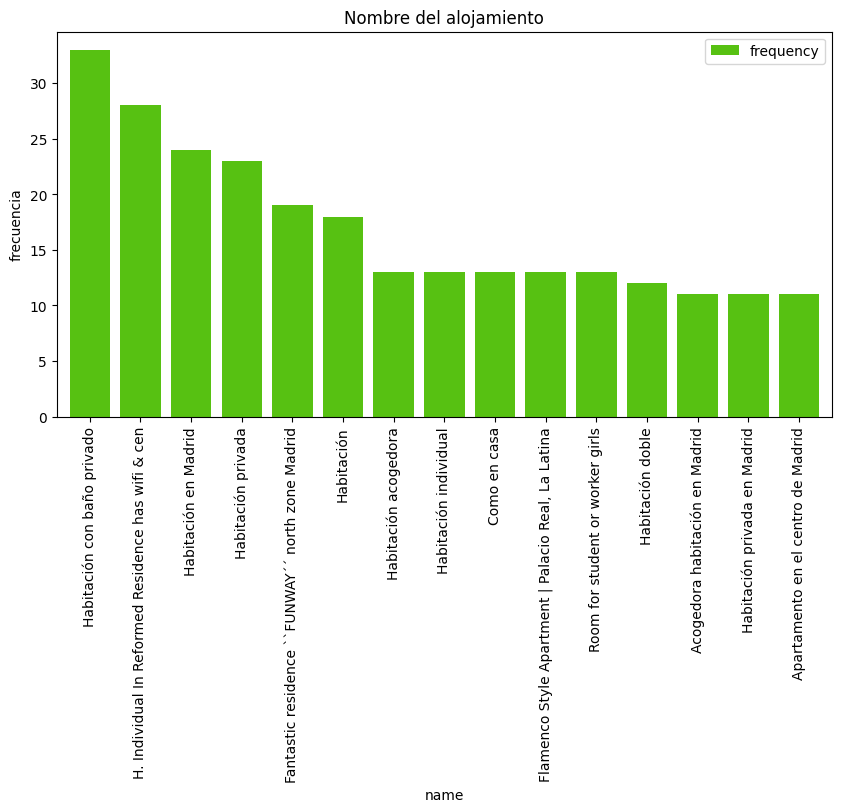

In [97]:
tabla7=freq_tbl(Madrid_outliers["name"])
filtro7=tabla7[tabla7["frequency"]>10]
filtro7_index=filtro7.set_index("name")
filtro7_index_freq=filtro7_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro7_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#57c112")
plt.ylabel("frecuencia")
plt.title("Nombre del alojamiento")

Text(0.5, 1.0, 'Nombre del host')

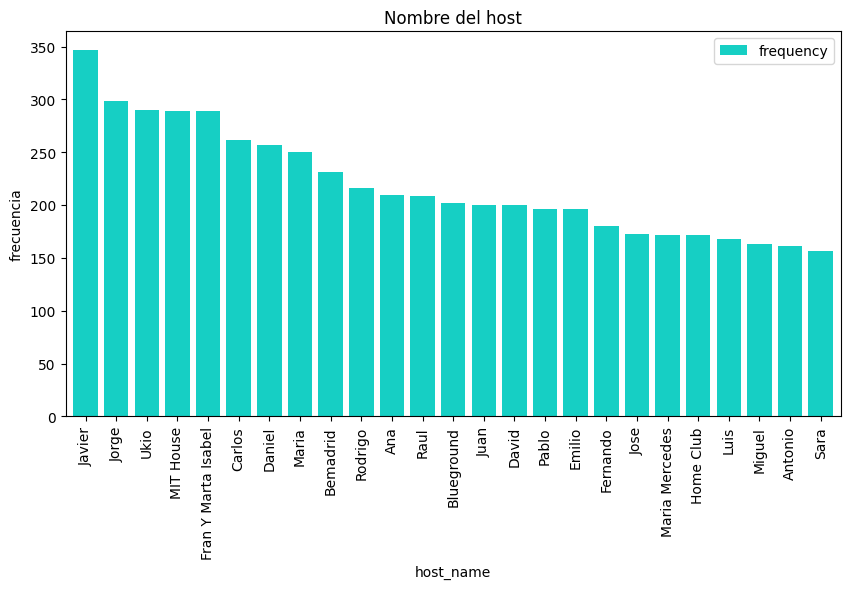

In [101]:
tabla8=freq_tbl(Madrid_outliers["host_name"])
filtro8=tabla8[tabla8["frequency"]>150]
filtro8_index=filtro8.set_index("host_name")
filtro8_index_freq=filtro8_index.drop(["percentage", "cumulative_perc"], axis=1)
filtro8_index_freq.plot(kind="bar", width=.8, figsize=(10,5), color="#16cfc4")
plt.ylabel("frecuencia")
plt.title("Nombre del host")